In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

In [5]:
df_full = pd.read_csv('data/AAPL.csv')

In [6]:
df_full.shape

(250, 7)

In [7]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-17,222.149994,222.949997,217.270004,217.880005,214.550659,37195100
1,2018-09-18,217.789993,221.850006,217.119995,218.240005,214.905167,31571700
2,2018-09-19,218.500000,219.619995,215.300003,218.369995,215.033142,27123800
3,2018-09-20,220.240005,222.279999,219.149994,220.029999,216.667816,26608800
4,2018-09-21,220.779999,221.360001,217.289993,217.660004,214.334030,96246700


In [8]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,192.005960,194.051640,190.013320,192.048080,190.506955,3.249190e+07
std,20.948312,21.089815,20.850386,20.916556,20.816736,1.391808e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.737499,175.902496,173.362499,174.757499,173.279304,2.289640e+07
50%,196.364998,198.750000,193.805000,196.345001,195.165612,2.904540e+07
75%,207.449997,209.089996,205.104996,207.479996,206.476417,3.876678e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


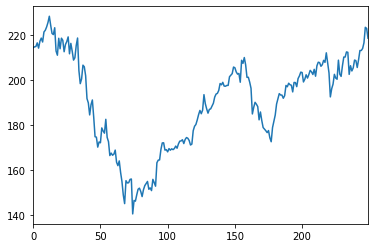

In [9]:
df_full["Adj Close"].plot()

In [10]:
df_full.set_index("Date", inplace=True)

In [11]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [12]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [13]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [14]:
y_test.shape

(44,)

In [15]:
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [16]:
y_pred_lag=np.roll(y_test,1)

In [19]:
get_performance(y_pred_lag)

Mean Absolute Error: 3.2488
Mean Squared Error: 19.5791
Root Mean Squared Error: 4.4248


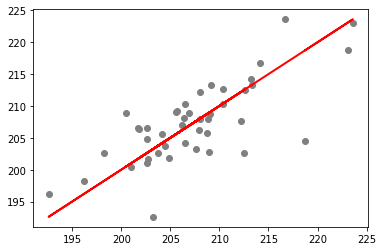

In [18]:
get_plot(y_pred_lag)

# Linear Regression

In [20]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred_lr=model_lr.predict(x_test)

In [22]:
get_performance(y_pred_lr)

Mean Absolute Error: 3.3142
Mean Squared Error: 18.6691
Root Mean Squared Error: 4.3208


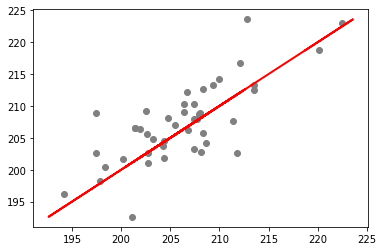

In [23]:
get_plot(y_pred_lr)

In [24]:
get_performance(y_pred_lr)

Mean Absolute Error: 3.3142
Mean Squared Error: 18.6691
Root Mean Squared Error: 4.3208


In [25]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [26]:
get_performance(y_pred_ridge)

Mean Absolute Error: 3.314
Mean Squared Error: 18.6666
Root Mean Squared Error: 4.3205


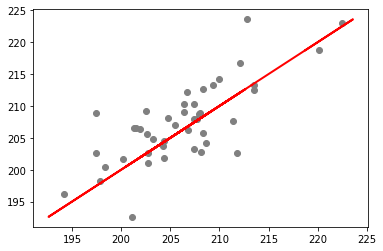

In [27]:
get_plot(y_pred_ridge)

In [28]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [29]:
get_performance(y_pred_gb)

Mean Absolute Error: 5.4802
Mean Squared Error: 50.2573
Root Mean Squared Error: 7.0892


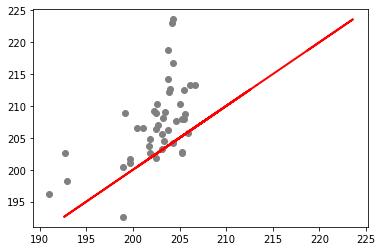

In [30]:
get_plot(y_pred_gb)

In [31]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

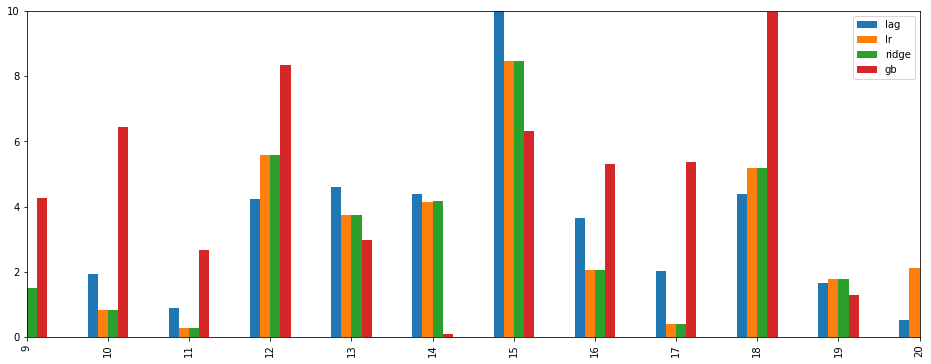

In [32]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)